In [12]:
import numpy as np

# Step 1: Fake word embeddings for 5-word sentence
X = np.array([
    [0.1, 0.3, 0.2, 0.0],  
    [0.4, 0.2, 0.1, 0.1],  
    [0.3, 0.5, 0.6, 0.2],  
    [0.7, 0.8, 0.2, 0.3],   
    [0.2, 0.1, 0.5, 0.4],   
])  # Shape: (5, 4)

# Step 2: Define a filter of size (2, 4)
W = np.array([
    [0.1, 0.2, -0.1, 0.0],
    [0.0, 0.1, 0.2, 0.3]
])  # Shape: (2, 4)

# Step 3: Define bias
bias = 0.1

# Step 4: Manual convolution operation (stride=1)
output = []
for i in range(len(X) - W.shape[0] + 1):  # 5 - 2 + 1 = 4 steps
    window = X[i:i+2]    # Shape: (2, 4)
    print(f"window {i}:")
    print(window)
    print(f"window*w {i}:")
    print(window*W)
    conv = np.sum(window * W) + bias  # Element-wise multiply + sum + bias
    output.append(conv)

output = np.array(output)  # Shape: (4,)
print("Convolution Output:", output)




window 0:
[[0.1 0.3 0.2 0. ]
 [0.4 0.2 0.1 0.1]]
window*w 0:
[[ 0.01  0.06 -0.02  0.  ]
 [ 0.    0.02  0.02  0.03]]
window 1:
[[0.4 0.2 0.1 0.1]
 [0.3 0.5 0.6 0.2]]
window*w 1:
[[ 0.04  0.04 -0.01  0.  ]
 [ 0.    0.05  0.12  0.06]]
window 2:
[[0.3 0.5 0.6 0.2]
 [0.7 0.8 0.2 0.3]]
window*w 2:
[[ 0.03  0.1  -0.06  0.  ]
 [ 0.    0.08  0.04  0.09]]
window 3:
[[0.7 0.8 0.2 0.3]
 [0.2 0.1 0.5 0.4]]
window*w 3:
[[ 0.07  0.16 -0.02  0.  ]
 [ 0.    0.01  0.1   0.12]]
Convolution Output: [0.22 0.4  0.38 0.54]


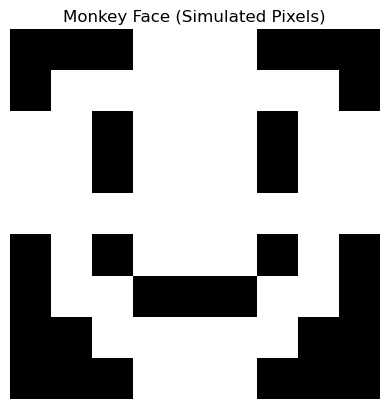

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# For demonstration, let's generate a synthetic "monkey" image-like structure.
monkey_pixels = np.array([
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
    [0, 255, 255, 255, 255, 255, 255, 255, 0],
    [255, 255, 0, 255, 255, 255, 0, 255, 255],
    [255, 255, 0, 255, 255, 255, 0, 255, 255],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [0, 255, 0, 255, 255, 255, 0, 255, 0],
    [0, 255, 255, 0, 0, 0, 255, 255, 0],
    [0, 0, 255, 255, 255, 255, 255, 0, 0],
    [0, 0, 0, 255, 255, 255, 0, 0, 0],
], dtype=np.uint8)

# Display the image
plt.imshow(monkey_pixels, cmap='gray')
plt.title("Monkey Face (Simulated Pixels)")
plt.axis('off')
plt.show()


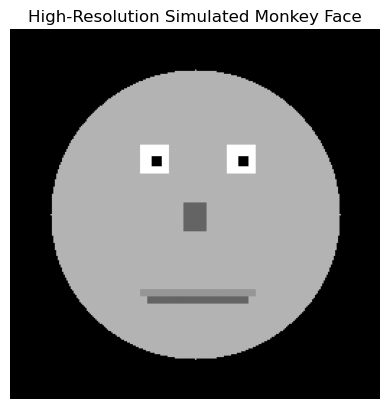

In [15]:
# Let's generate a synthetic high-resolution "monkey face"-like pattern from scratch using pixel art style.
# We'll create a 256x256 grayscale image with simple shapes to simulate a monkey-like face.

monkey_highres = np.zeros((256, 256), dtype=np.uint8)

# Draw circular face
yy, xx = np.ogrid[:256, :256]
center = (128, 128)
radius = 100
mask = (yy - center[0])**2 + (xx - center[1])**2 <= radius**2
monkey_highres[mask] = 180  # face

# Draw eyes
monkey_highres[80:100, 90:110] = 255  # left eye
monkey_highres[80:100, 150:170] = 255  # right eye

# Draw pupils
monkey_highres[88:95, 98:105] = 0  # left pupil
monkey_highres[88:95, 158:165] = 0  # right pupil

# Draw nose
monkey_highres[120:140, 120:136] = 100

# Draw mouth
monkey_highres[180:185, 90:170] = 150
monkey_highres[185:190, 95:165] = 100

# Display the image
plt.imshow(monkey_highres, cmap='gray')
plt.title("High-Resolution Simulated Monkey Face")
plt.axis('off')
plt.show()


In [28]:
import numpy as np

# Step 1: Simulated word embeddings for a 3-word sentence
vocab = ["the", "cat", "sat", "on", "mat"]
embedding_dim = 5

embedding_matrix = {
    "the":  np.array([0.2, 0.1, -0.3, 0.5, 0.0]),
    "cat":  np.array([0.4, -0.2, 0.3, 0.0, 0.1]),
    "sat":  np.array([-0.1, 0.2, 0.4, -0.3, 0.3]),
    "on":   np.array([0.1, -0.1, 0.2, 0.1, -0.2]),
    "mat":  np.array([0.3, 0.0, 0.1, 0.4, -0.1]),
}

# Step 2: Define a learned transformation (simulate CNN/FFN weights)
W = np.array([0.2, 0.3, -0.1, 0.4, 0.1])  # filter or weight vector
b = 0.05  # bias

# Step 3: Transform embeddings via dot product
transformed = {}
for word, emb in embedding_matrix.items():
    dot = np.dot(emb, W) + b
    transformed[word] = dot

# Step 4: Simulate decoding (match dot product output to vocab embedding)
# We'll do reverse lookup by finding the embedding whose dot with W is closest

# Create matrix of all vocab embeddings
emb_matrix = np.stack(list(embedding_matrix.values()))  # shape (5, 5)


# Simulate decoding each transformed value
decoded = []
for word, val in transformed.items():
    # Find the embedding whose dot product with W is closest to this value
    dots = emb_matrix @ W + b
    print(f"dots:")
    print(dots)
    print ( f"value operation:")
    print(np.abs(dots - val))
    closest_index = np.argmin(np.abs(dots - val))
    print(f"closest_index: {closest_index}  ")
    decoded_word = vocab[closest_index]
    decoded.append((word, val, decoded_word))


df = pd.DataFrame(decoded, columns=["Original Word", "Transformed Value", "Decoded Word"])
print(df)

dots:
[ 0.35  0.05 -0.04  0.04  0.25]
value operation:
[0.   0.3  0.39 0.31 0.1 ]
closest_index: 0  
dots:
[ 0.35  0.05 -0.04  0.04  0.25]
value operation:
[3.0000000e-01 6.9388939e-18 9.0000000e-02 1.0000000e-02 2.0000000e-01]
closest_index: 1  
dots:
[ 0.35  0.05 -0.04  0.04  0.25]
value operation:
[0.39 0.09 0.   0.08 0.29]
closest_index: 2  
dots:
[ 0.35  0.05 -0.04  0.04  0.25]
value operation:
[0.31 0.01 0.08 0.   0.21]
closest_index: 3  
dots:
[ 0.35  0.05 -0.04  0.04  0.25]
value operation:
[0.1  0.2  0.29 0.21 0.  ]
closest_index: 4  
  Original Word  Transformed Value Decoded Word
0           the               0.35          the
1           cat               0.05          cat
2           sat              -0.04          sat
3            on               0.04           on
4           mat               0.25          mat


In [31]:
np.array([2,3,3,4,5,1])

array([2, 3, 3, 4, 5, 1])

In [35]:
print(np.argmin(np.array([2,3,3,4,5,1])))

print(np.argmax(np.array([2,3,3,4,5,1])))

5
4
